# Exploratory Data Analysis of 

## Table of Contents
1. Introduction
2. Importing Libraries
3. Data Acquisition & Description
4. Data Pre-Processing
5. Data Analysis
6. Regional User Profiles
7. Hypothesis Testing
8.  Conclusion

## 1. Introduction
This section will introduce the purpose and objectives of your analysis, focusing on video game sales.

## 2. Importing Libraries
In this section, we import the necessary libraries for data manipulation, analysis, and visualization. These libraries provide a range of functions that facilitate our exploratory data analysis.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
from scipy import stats

In [36]:
%matplotlib inline

## 3. Data Acquisition & Description

### 3.1 Reading CSV File: Load your video game sales dataset.

In [37]:
games = pd.read_csv(r'C:\Users\James\Project_games\games.csv')

### 3.2 Overview of the Dataset: Display the first few rows, shape, and data types. Provide a brief description of each column.

In [38]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [39]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [40]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [41]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [42]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [43]:
games.shape

(16715, 11)

## 4. Data Pre-Processing

### 4.1. Handling Missing Values and Data Types: Address missing values, convert data types, and deal with 'TBD' values.

In [44]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [45]:
print(games.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [46]:
for col in games.select_dtypes(include=np.number).columns:
    games[col].fillna(games[col].median(), inplace=True)
games['User_Score'] = games['User_Score'].astype(str).str.lower().replace('tbd', np.nan)
games['User_Score'] = games['User_Score'].astype(float)
games['User_Score'].fillna(games['User_Score'].median(), inplace=True)
games['Year_of_Release'] = games['Year_of_Release'].astype(int)
games['Genre'] = games['Genre'].astype('category')
games['Platform'] = games['Platform'].astype('category')
games['Rating'] = games['Rating'].astype('category')
games['total_sales'] = games[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

### 4.2. Adding New Columns: Calculate total sales for each game.

## 5. Data Analysis

### 5.1 Game Release Trends

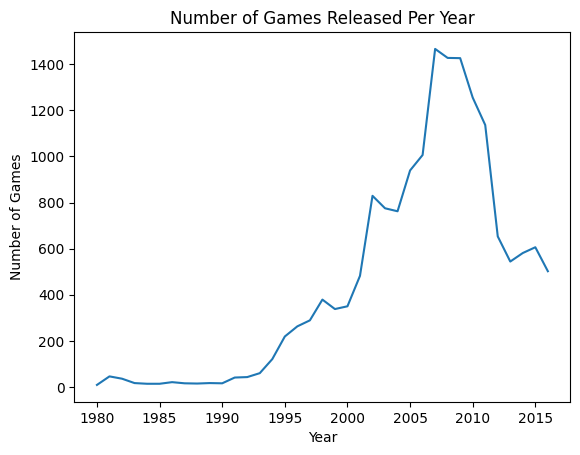

In [47]:
games_per_year = games.groupby('Year_of_Release')['Name'].count()
games_per_year.plot(kind='line')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

### Industry see fluctuations in the number of games released over the years, possibly correlated with technological innovation and platform transitions. 

### 5.2 Sales Variations Across Platforms
Group by platform and sum up the total sales

In [48]:
platform_sales = games.groupby('Platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

Platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_39252\4143711789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = games.groupby('Platform')['total_sales'].sum().sort_values(ascending=False)


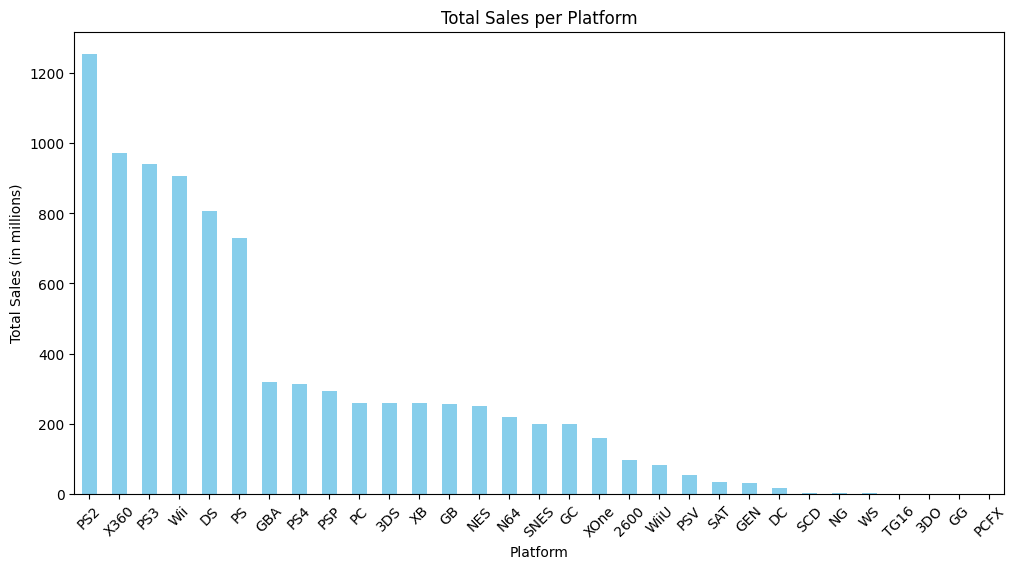

In [49]:
plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

### Sales variations across platforms. the bar chart showcase total sales per platform indicated a clear hierachy in platform populartiy. specifically the PS2

### 5.3 Platform Life Cycles

Plotting the platform life cycles

In [50]:
platform_yearly_sales = games.pivot_table(index='Year_of_Release', columns='Platform', values='total_sales', aggfunc='sum')

platform_yearly_sales.fillna(0, inplace=True)

print(platform_yearly_sales)


Platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
Year_of_Release                                                                 
1980             11.38  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1981             35.68  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982             28.88  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983              5.84  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984              0.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.45  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.67  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1987              1.94  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988              0.74  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989              0.63  0.00   0.00  0.00    0.00  64.97   0.00   0.00   0.00   
1990              0.00  0.00

### Platform life cycle the line graphy depicts yearly sales per platform and show the rise and fall of each one. Specially the Wii and PS2 with declining after hitting record sales.

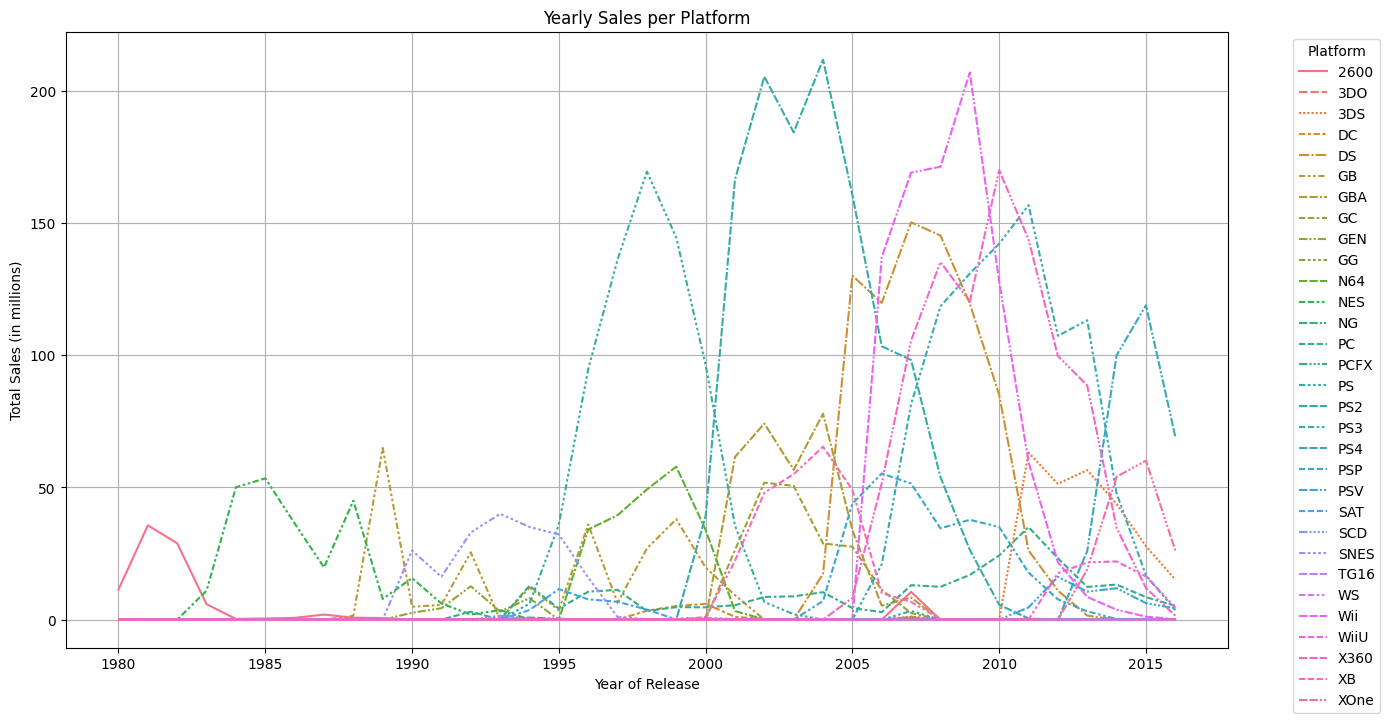

In [51]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=platform_yearly_sales)
plt.title('Yearly Sales per Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 5.4 Global Sales Analysis
Total Sales by Region
Sales Trend Over Time
Comparing Sales Between Region

In [52]:
total_sales_na = games['NA_sales'].sum()
total_sales_eu = games['EU_sales'].sum()
total_sales_jp = games['JP_sales'].sum()
total_sales_other = games['Other_sales'].sum()

print(f"Total Sales in North America: {total_sales_na} million")
print(f"Total Sales in Europe: {total_sales_eu} million")
print(f"Total Sales in Japan: {total_sales_jp} million")
print(f"Total Sales in Other Regions: {total_sales_other} million")

Total Sales in North America: 4402.35 million
Total Sales in Europe: 2424.67 million
Total Sales in Japan: 1297.37 million
Total Sales in Other Regions: 791.32 million


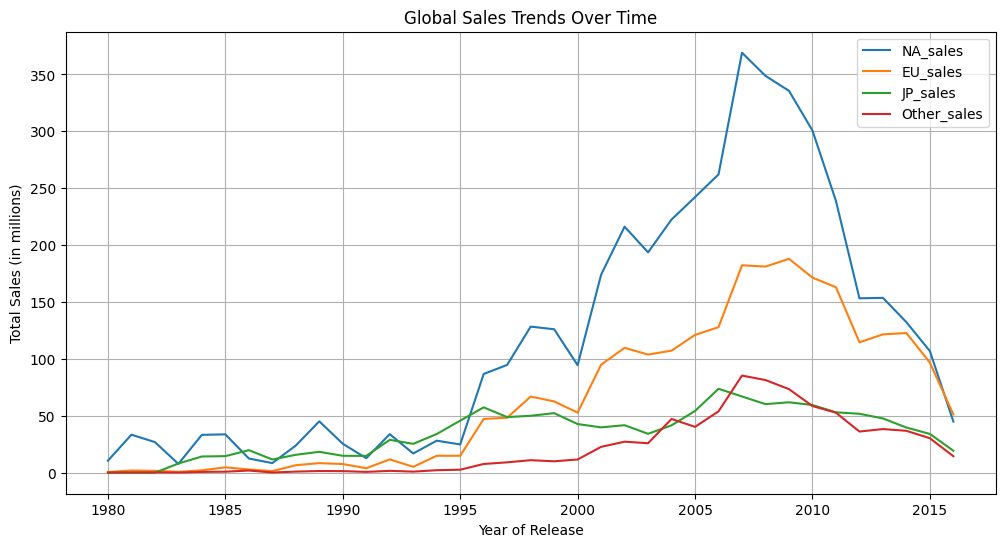

In [53]:
yearly_sales = games.groupby('Year_of_Release').agg({
    'NA_sales': 'sum',
    'EU_sales': 'sum',
    'JP_sales': 'sum',
    'Other_sales': 'sum'
})

yearly_sales.plot(figsize=(12, 6))
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

### Global Sales Analysis sales trend over time showed significant regional differences with North America an Europe being the largest markets. Peak sales areound mid 2000 to early 2010. 

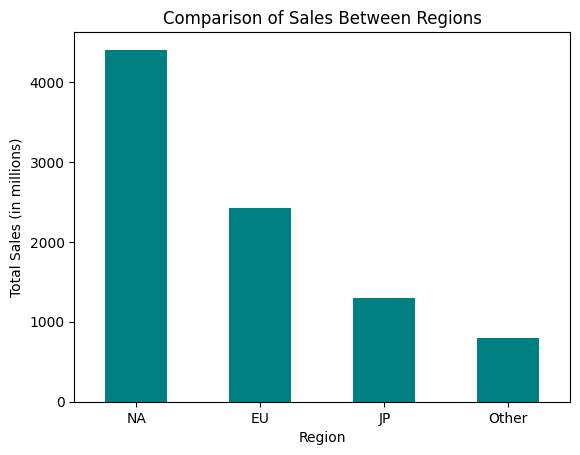

In [54]:
region_sales = pd.DataFrame({
    'Region': ['NA', 'EU', 'JP', 'Other'],
    'Total Sales': [total_sales_na, total_sales_eu, total_sales_jp, total_sales_other]
})

region_sales.plot(x='Region', y='Total Sales', kind='bar', legend=False, color='teal')
plt.title('Comparison of Sales Between Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0)
plt.show()

### 5.5 User and Critic Review Analysis
Analyzing the Relationship Between User Scores and Total Sales
Analyzing the Relationship Between Critic Scores and Total Sales
Correlation Analysis Testing to see the strenght of the relationship between scores and sales

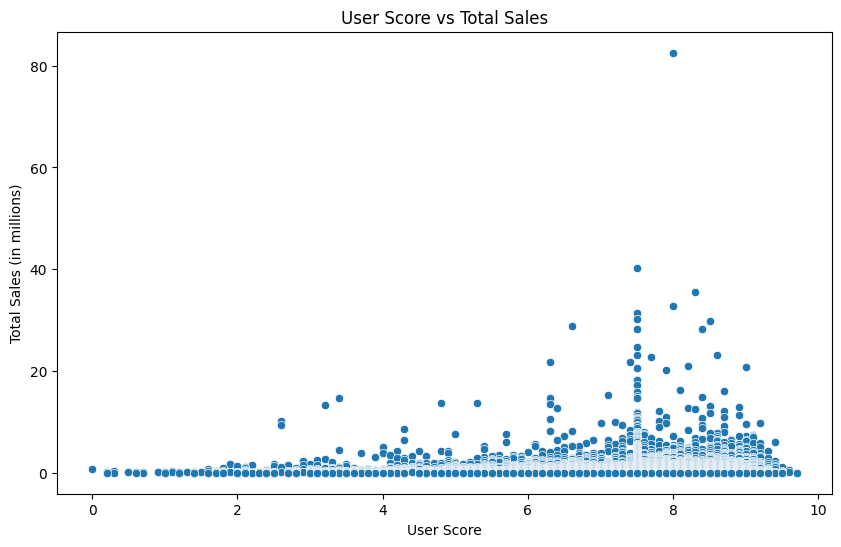

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games, x='User_Score', y='total_sales')
plt.title('User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

### User and critic's reviews using scatter plots that if you have a higher score you typically gurantee higher sales, also due to loyalty, marketing, and platform exclusivity 

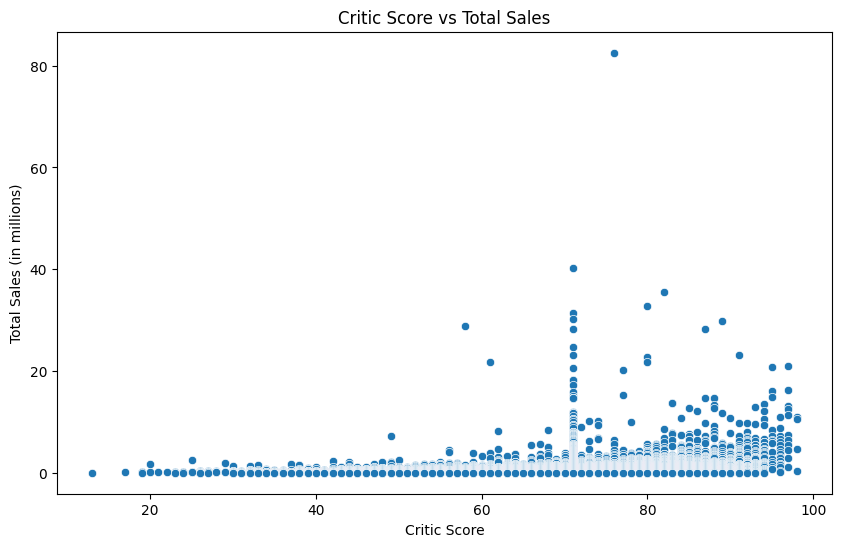

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games, x='Critic_Score', y='total_sales')
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [57]:
user_score_corr = games['User_Score'].corr(games['total_sales'])
critic_score_corr = games['Critic_Score'].corr(games['total_sales'])

print(f'Correlation between User Score and Total Sales: {user_score_corr}')
print(f'Correlation between Critic Score and Total Sales: {critic_score_corr}')

Correlation between User Score and Total Sales: 0.04877449728170787
Correlation between Critic Score and Total Sales: 0.18977325512080204


### 5.6 Comparative Analysis by Genre and Platform
Creating a Pivot Table for Sales by Genre and Platform
Heatmap Visualization
Bar Chart

In [58]:
genre_platform_sales = games.pivot_table(index='Genre', columns='Platform', values='total_sales', aggfunc='sum', fill_value=0)

print(genre_platform_sales)

Platform       2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
Genre                                                                        
Action        29.25  0.00  58.24  1.26  112.58   7.93  55.66  37.70   2.74   
Adventure      1.70  0.06   4.92  2.50   45.97  17.15  14.63   5.93   0.19   
Fighting       1.24  0.00  10.56  1.83    7.08   0.00   4.16  18.43   5.89   
Misc           3.57  0.00  10.99  0.00  135.64  13.35  36.09  16.72   0.03   
Platform      13.26  0.00  32.53  2.53   75.83  54.91  78.21  28.59  15.44   
Puzzle        14.69  0.02   5.57  0.00   82.48  47.47  12.81   4.69   0.00   
Racing         2.91  0.00  14.96  2.65   38.00   4.55  18.81  21.87   0.26   
Role-Playing   0.00  0.00  84.23  0.68  124.45  88.24  64.20  13.16   0.27   
Shooter       26.47  0.00   1.29  0.33    7.86   1.19   3.56  13.61   0.13   
Simulation     0.44  0.02  27.45  0.52  129.98   3.55   5.94   8.61   0.00   
Sports         3.45  0.00   6.17  3.65   31.38   9.06  16.32  25

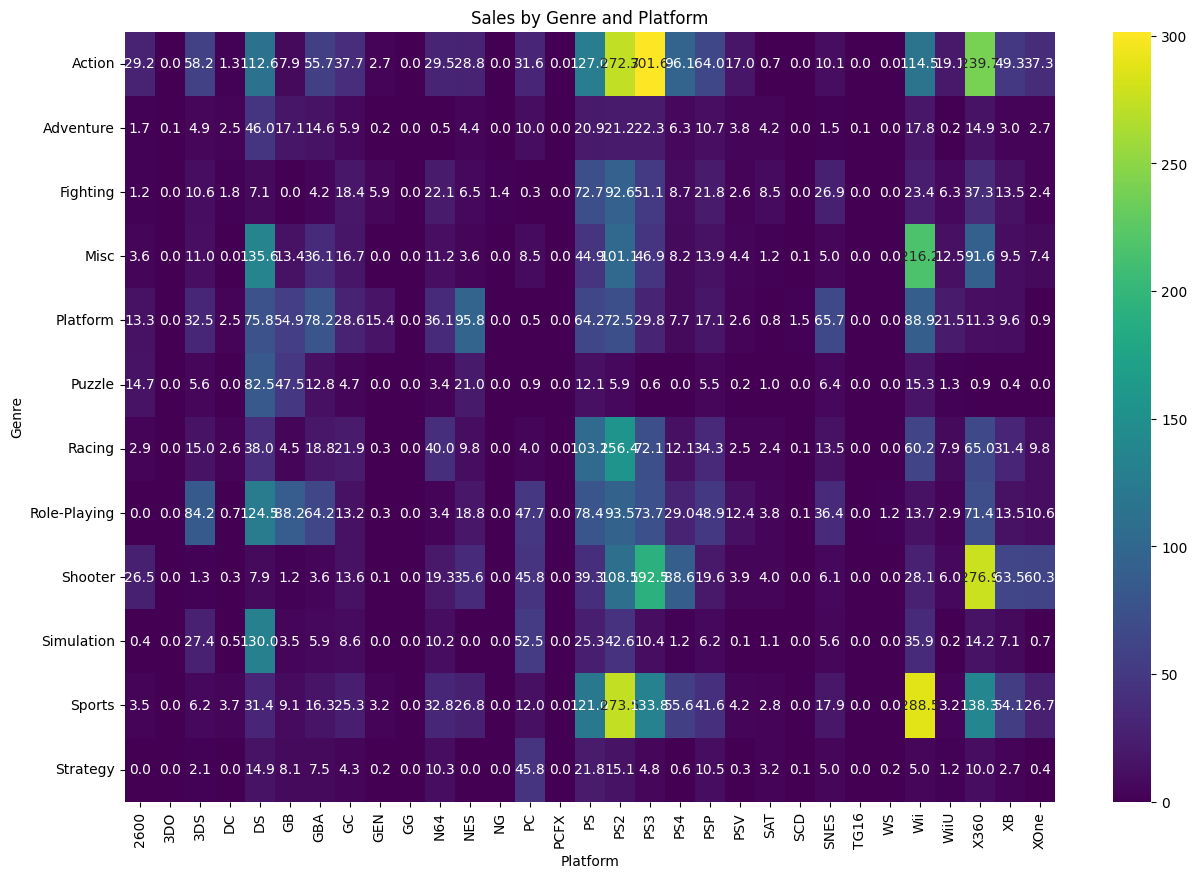

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(genre_platform_sales, annot=True, fmt=".1f", cmap='viridis')
plt.title('Sales by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

### This helps developer to target which area for greater sales based on genre

## 6. Regional User Profiles

### 6.1 Top Platforms and Genres by Region
1. North America 
2. Europe
3. Japan

In [60]:
top_genres_na = games.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
print("Top Genres in North America:\n", top_genres_na)

top_genres_eu = games.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop Genres in Europe:\n", top_genres_eu)

top_genres_jp = games.groupby('Genre')['JP_sales'].sum().sort_values(ascending=False).head(5)
print("\nTop Genres in Japan:\n", top_genres_jp)


Top Genres in North America:
 Genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: NA_sales, dtype: float64

Top Genres in Europe:
 Genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: EU_sales, dtype: float64

Top Genres in Japan:
 Genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: JP_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_39252\1428827593.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_na = games.groupby('Genre')['NA_sales'].sum().sort_values(ascending=False).head(5)
C:\Users\James\AppData\Local\Temp\ipykernel_39252\1428827593.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_eu = games.groupby('Genre')['EU_sales'].sum().sort_values(ascending=False).head(5)
C:\Users\James\AppData\Local\Temp\ipykernel_39252\1428827593.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fal

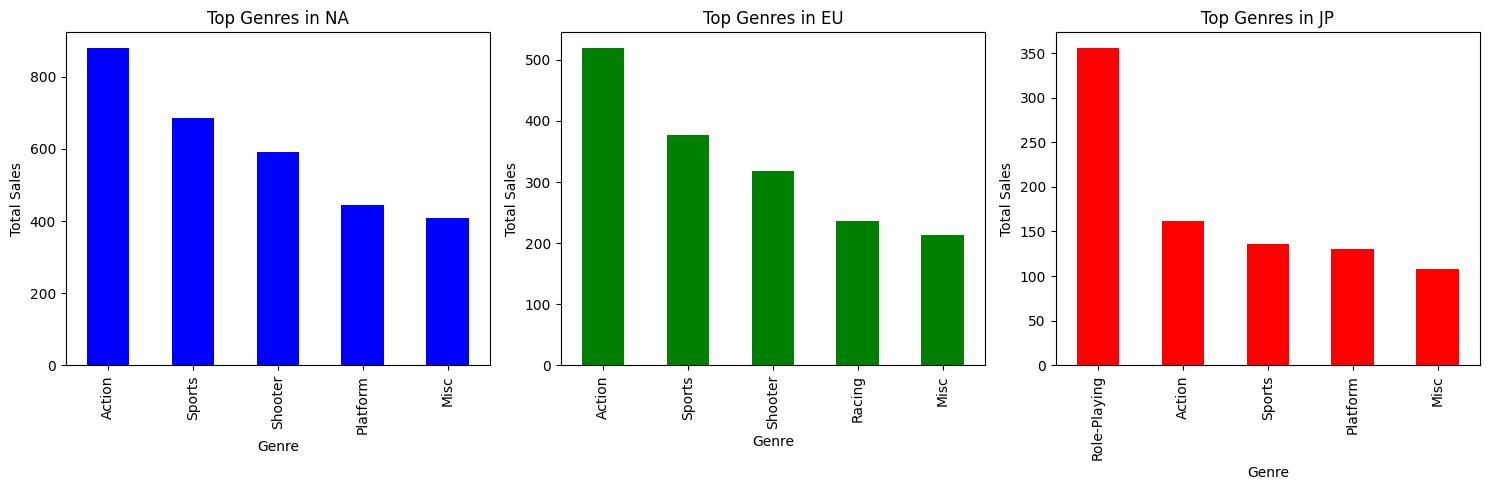

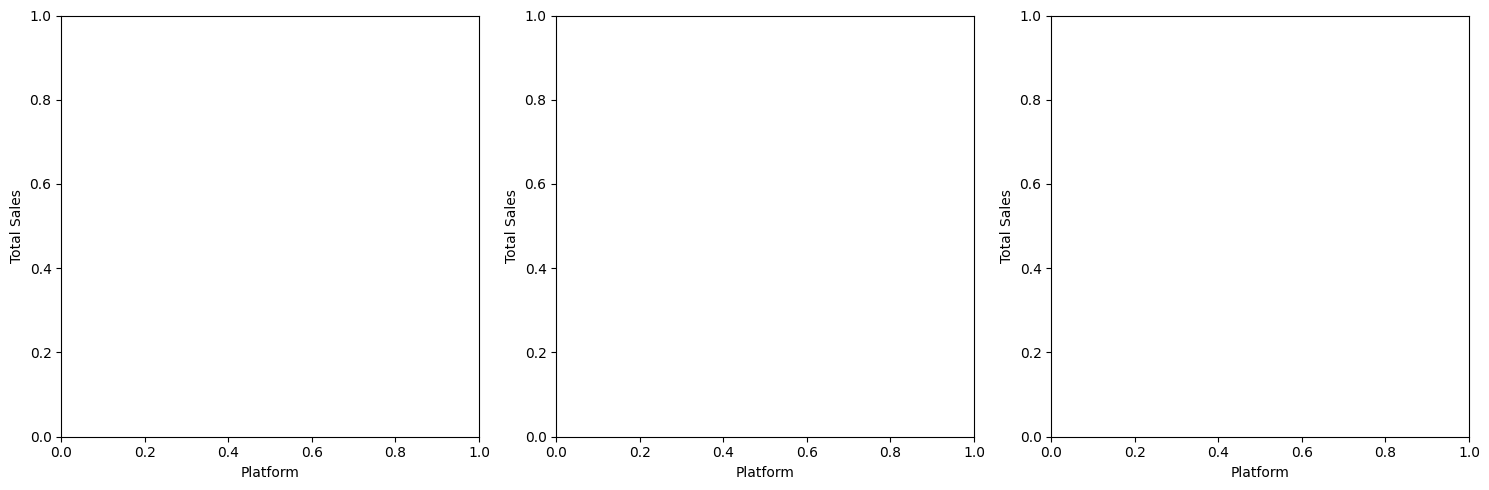

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top_genres_na.plot(kind='bar', ax=axs[0], color='blue').set_title('Top Genres in NA')
top_genres_eu.plot(kind='bar', ax=axs[1], color='green').set_title('Top Genres in EU')
top_genres_jp.plot(kind='bar', ax=axs[2], color='red').set_title('Top Genres in JP')

for ax in axs:
    ax.set_xlabel('Genre')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

top_platforms_na = games.groupby('Platform', observed=True)['NA_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_eu = games.groupby('Platform', observed=True)['EU_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_jp = games.groupby('Platform', observed=True)['JP_sales'].sum().sort_values(ascending=False).head(5)

for ax in axs:
    ax.set_xlabel('Platform')
    ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


### This shows that sports and action genres work better in NA and EU while role-playing games have strenght in Japan

### 6.2 Impact of ESRB Ratings on Sales
1. Grouping by ESRB rating and calculating total sales for North America, Europe, and Japan

In [62]:
esrb_sales = games.groupby('Rating')['total_sales'].sum().sort_values(ascending=False)

print(esrb_sales)

Rating
E       2435.52
T       1493.35
M       1473.79
E10+     655.60
K-A        4.32
AO         1.96
EC         1.75
RP         0.09
Name: total_sales, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_39252\3572108299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_sales = games.groupby('Rating')['total_sales'].sum().sort_values(ascending=False)


In [63]:
esrb_na_sales = games.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)

esrb_eu_sales = games.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)

esrb_jp_sales = games.groupby('Rating')['JP_sales'].sum().sort_values(ascending=False)

C:\Users\James\AppData\Local\Temp\ipykernel_39252\2306338197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_na_sales = games.groupby('Rating')['NA_sales'].sum().sort_values(ascending=False)
C:\Users\James\AppData\Local\Temp\ipykernel_39252\2306338197.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  esrb_eu_sales = games.groupby('Rating')['EU_sales'].sum().sort_values(ascending=False)
C:\Users\James\AppData\Local\Temp\ipykernel_39252\2306338197.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

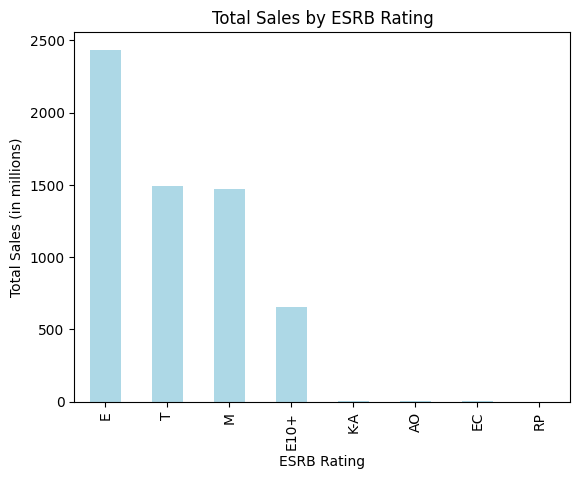

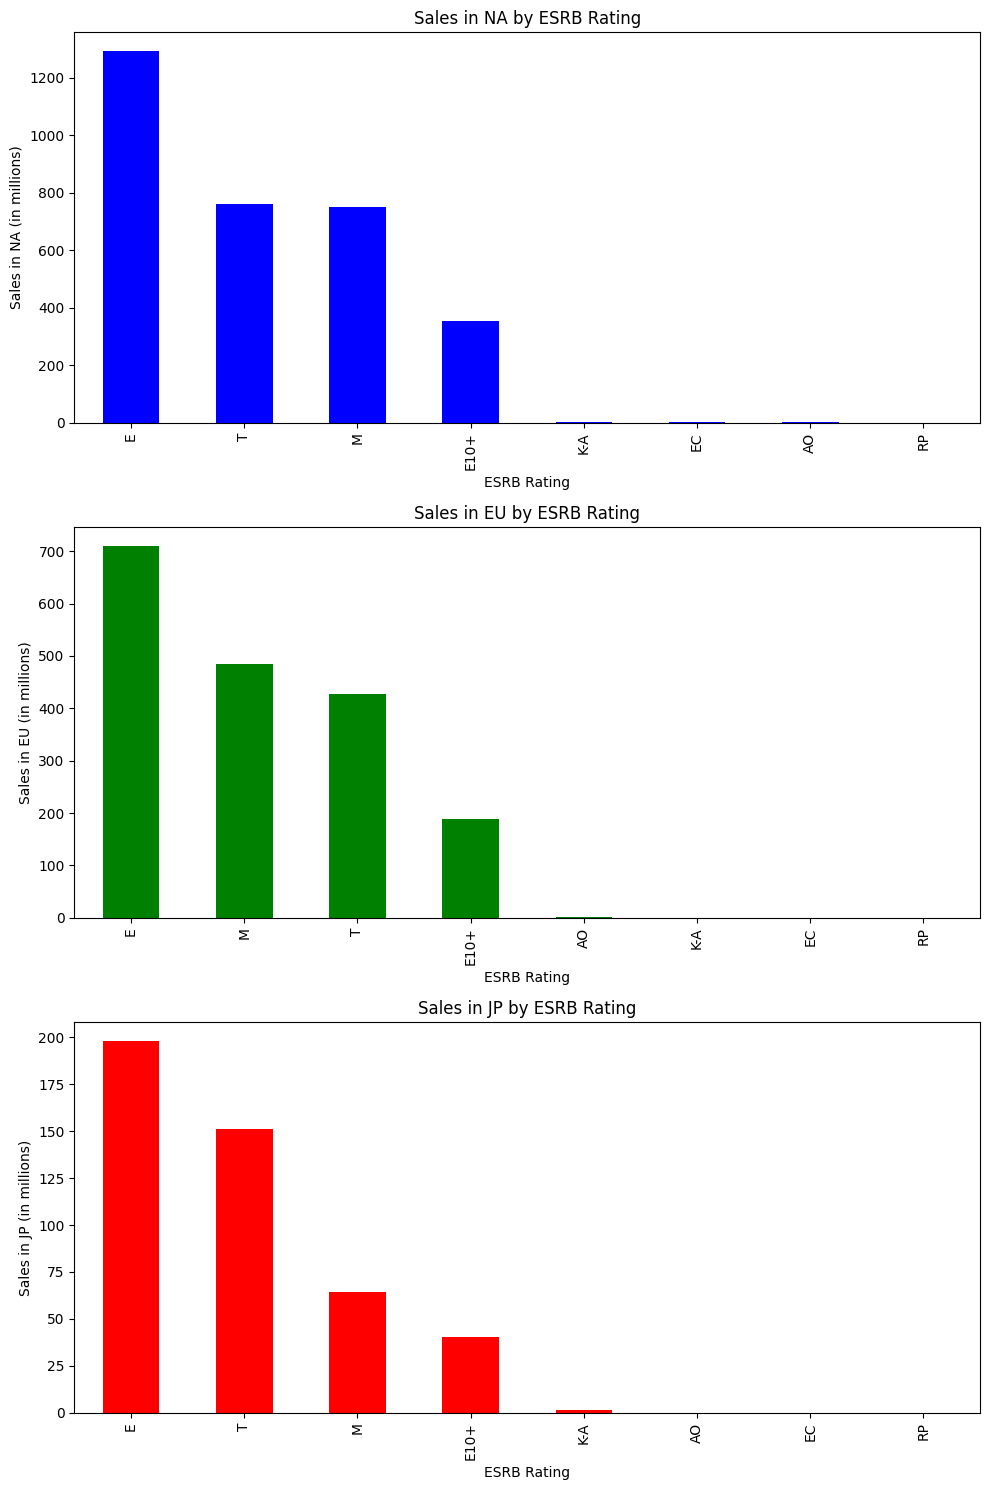

In [64]:
esrb_sales.plot(kind='bar', color='lightblue')
plt.title('Total Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.show()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

esrb_na_sales.plot(kind='bar', ax=axs[0], color='blue')
axs[0].set_title('Sales in NA by ESRB Rating')
axs[0].set_xlabel('ESRB Rating')
axs[0].set_ylabel('Sales in NA (in millions)')

esrb_eu_sales.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Sales in EU by ESRB Rating')
axs[1].set_xlabel('ESRB Rating')
axs[1].set_ylabel('Sales in EU (in millions)')

esrb_jp_sales.plot(kind='bar', ax=axs[2], color='red')
axs[2].set_title('Sales in JP by ESRB Rating')
axs[2].set_xlabel('ESRB Rating')
axs[2].set_ylabel('Sales in JP (in millions)')

plt.tight_layout()
plt.show()


### This really depends on region to show what is the perfence of the market and demographics that are playing on the system. 

## 7. Hypothesis Testing

### 7.1. Average User Ratings Comparison: Xbox One vs. PC, and Action vs. Sports genres.

In [65]:
xbox_one_ratings = games[(games['Platform'] == 'XOne') & games['User_Score'].notna()]['User_Score']
pc_ratings = games[(games['Platform'] == 'PC') & games['User_Score'].notna()]['User_Score']

t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -3.9004867777916163, P-value: 0.00010123955107193582


### 7.2. Statistical Tests: Outline the methods and results.

In [66]:
from scipy import stats

xbox_one_ratings = games[(games['Platform'] == 'XOne') & games['User_Score'].notna()]['User_Score']
pc_ratings = games[(games['Platform'] == 'PC') & games['User_Score'].notna()]['User_Score']

t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -3.9004867777916163, P-value: 0.00010123955107193582


## 8.  Conclusion
Summarize the key findings from your analysis.
1. In conclusion gaming industry is marked by evolving trend in platform dominace, gnere, popularity, and regional market perference. The analysis doesn't really show importants aligning to game development with trends and highlights of potential of user rating as a predictor of sales success. Going forward they will need to monitor these patters as technology and platform emerge. 